# Analys av Iris datasetet med Scikit-Learn
## Decision Tree
### Mål:
- Repetera Machine Learning: Scikit-Learn, plottning med Seaborn, Pandas etc
- Kolla om vi kan ***klassificera*** species i iris datasetet med hjälp av Decision Tree.
- Det här är ett ***"Multi-Class Classification"*** problem, eftersom det finns tre olika species av Iris.
<br>
### Steg för steg:
- Läser in datasetet från Seaborn. OBS, samma dataset kan även importeras från SciKit-Learn, men då är X, y redan separerade (X=iris.data, y=iris.target)
- Läser in nödvändiga delar från sklearn:  
`from sklearn.model_selection import train_test_split`  
`from sklearn.metrics import accuracy_score, classification_report`  
`from sklearn.metrics import confusion_matrix`  
- Definierar X (oberoende variabler, features) och y (beroende variabel, target). Byter ut namnet på iris till 0, 1 eller 2 manuellt.  
`iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})`
- Definierar ett model-object:  
`model = DecisionTreeClassifier()`
- Tränar modellen med .fit  
`model.fit(X_train, y_train)`
- Använder den tränade modellen för att prediktera y_pred:  
`y_pred = model.predict(X_test)`
- Evaluerar modellen:  
`print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")`  
`print("Classification Report:")`  
`print(classification_report(y_test, y_pred))`  
- Visualiserar en Confusion Matrix med Seaborn
- Gör en enkel Hyperparameter Tuning för olika ***k*** Nearest Neighbor.
## Noteringar / Lessons Learned
- Decision trees kan användas både för klassificering och regression.
- Decision trees overfittar gärna, den lär sig träningsdatan för bra. Det finns flera sätt att förbättra detta: ***bagging***, ***random forest***, ***boosting***. Alla dessa metoder bygger på att använda många fler decision trees och ibland även slumpmässighet.  
- Decision Trees börjar med en ***root***, som sedan följs av ***splits*** som producerar ***branches*** (även kallade ***edges***). Brancherna länkar till ***leaves*** (även kallade ***nodes***), vilka utgör ***decision points***. En slutlig kategorisering produceras när ett leaf inte längre producerar nya branches vilket resulterar i en ***terminal node***.   
- Målet är att trädet ska vara så litet som möjligt, genom att dela datan så optimalt i homogena grupper. Detta genom att minimera ***entropin*** i nästa branch.
- ***entropi*** är ett matematiska begrepp som kvantifierar variansen. En ***greedy algorithm*** maximerar entropin i varje split.
- Decision trees är enkla att visualisera, medans de andra förbättrade teknikerna är svåröverblickbara.
## Hyperparametrar:
- för Random Forest, kan man iaf ange ***maximalt djup***.
## Länkar:
[Geek for Geeks - decision trees](https://www.geeksforgeeks.org/decision-tree/?ref=header_outind)

In [1]:
import seaborn as sn
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # denna ska användas för att skapa en beslutsträd klassificerare
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from seaborn import load_dataset
import numpy as np

In [2]:
iris = load_dataset('iris') # load iris dataset as a pandas dataframe

In [3]:
pd.set_option('future.no_silent_downcasting', True) # to avoid warning on deprecated 'replace' method
iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})

# Define X and y
X = iris.drop(columns=['species'])
y = iris[['species']]

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# convert y_train to 1D (numpy) array to avoid warning
if not isinstance(y_train, np.ndarray):
    y_train = y_train.values.ravel()
    y_train = y_train.astype(int) # make sure y_train is of type int

# convert y_test to 1D (numpy) array to avoid warning
if not isinstance(y_test, np.ndarray):
	y_test = y_test.values.ravel()
	y_test = y_test.astype(int) # make sure y_test is of type int

In [5]:
model = DecisionTreeClassifier() # create a DecisionTreeClassifier object
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

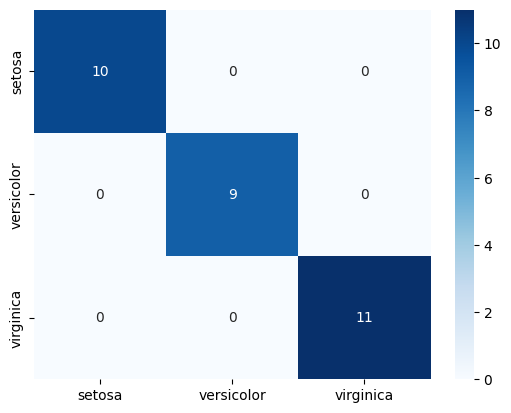

In [7]:
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])

Visualising the decision tree:

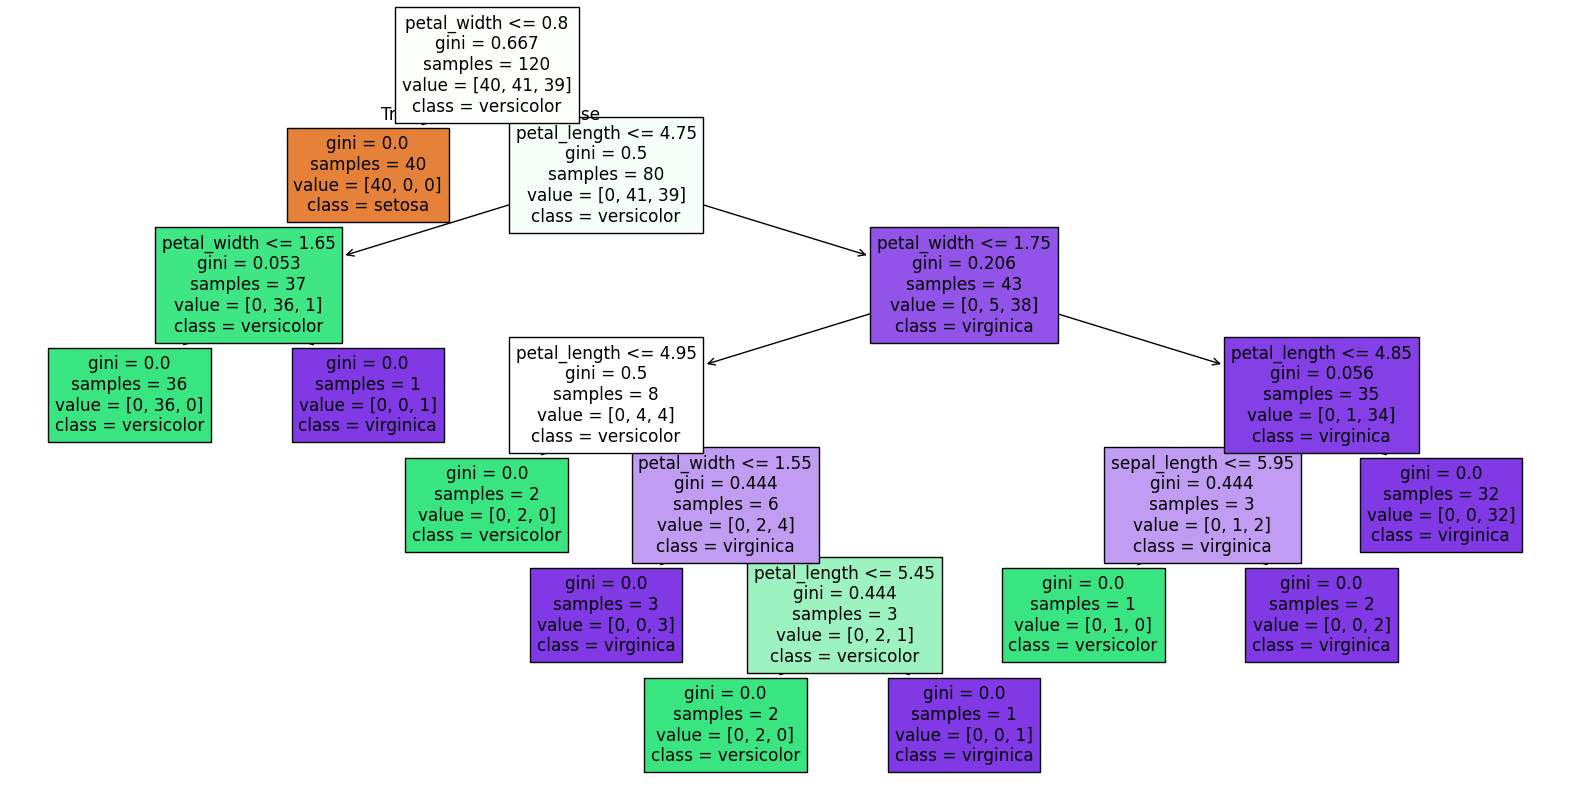

In [8]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['setosa', 'versicolor', 'virginica'], filled=True)
plt.show()